**FINGERPRINT BASED VOTING SYSTEM**

**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARIES

In [14]:
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

LOAD DATASET

In [18]:
data_path = "/content/drive/MyDrive/data/"
print("Folders:", os.listdir(data_path))

Folders: ['user2', 'user1', 'user3']


LOAD AND RESIZE IMAGE

In [20]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images
user_data = {}
for user_folder in os.listdir(data_path):
    full_path = os.path.join(data_path, user_folder)
    user_data[user_folder] = load_images_from_folder(full_path)
for user, imgs in user_data.items():
    print(f"{user}: {len(imgs)} samples")

user2: 8 samples
user1: 8 samples
user3: 8 samples


PREPROCESS THE DATA

In [22]:
img_size = 128
X = []
y = []
for user, imgs in user_data.items():
    for img in imgs:
        img = cv2.resize(img, (img_size, img_size))
        X.append(img)
        y.append(user)
X = np.array(X)
y = np.array(y)
X = X / 255.0
X = X.reshape(-1, img_size, img_size, 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

TRAIN A CNN CLASSIFIER

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,131 (28.20 MB)

 Trainable params: 7,392,131 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - accuracy: 1.0000 - loss: 4.6504e-04 - val_accuracy: 0.8000 - val_loss: 0.6772
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8000 - val_loss: 0.6655
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 1.0000 - loss: 2.7095e-04 - val_accuracy: 0.8000 - val_loss: 0.6561
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8000 - val_loss: 0.6494
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 1.0000 - loss: 3.1222e-04 - val_accuracy: 0.8000 - val_loss: 0.6423
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step - accuracy: 1.0000 - loss: 2.3125e-04 - val_accuracy: 0.8000 - val_loss: 0.6366
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step - accuracy: 1.0000 - loss: 4.9241e-04 - val_accuracy: 0.8000 - val_loss: 0.6318
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - accuracy: 1.0000 - loss: 1.0020e-04 - val_accu

ACCURACY

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8000 - loss: 0.7068
Accuracy: 80.00%


CONFUSION MATRIX

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


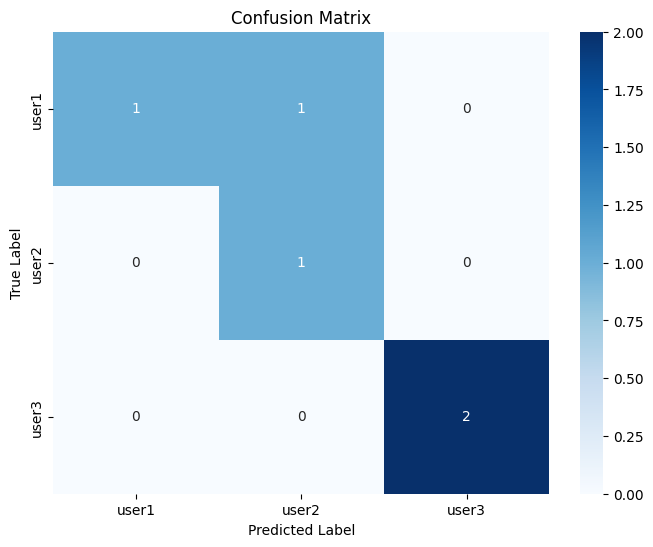

In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ONE-PERSON-ONE-VOTE-LOGIC(VOTING LOGIC)

In [31]:
voted_users = {label: False for label in le.classes_}

In [33]:
def vote_with_cnn(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0
    img = img.reshape(1, img_size, img_size, 1)
    prediction = model.predict(img)
    user_index = np.argmax(prediction)
    user_label = le.inverse_transform([user_index])[0]
    if voted_users[user_label]:
        print(f"❌ {user_label} has already voted!")
    else:
        voted_users[user_label] = True
        print(f"✅ Vote recorded for {user_label}")

In [34]:
vote_with_cnn('/content/drive/MyDrive/data/user2/finger1.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
✅ Vote recorded for user2


In [35]:
vote_with_cnn('/content/drive/MyDrive/data/user2/finger1.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
❌ user2 has already voted!


In [36]:
vote_with_cnn('/content/drive/MyDrive/data/user1/finger1.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ Vote recorded for user1


In [37]:
vote_with_cnn('/content/drive/MyDrive/data/user3/finger1.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ Vote recorded for user3


In [38]:
print(f"{voted_users}")

{np.str_('user1'): True, np.str_('user2'): True, np.str_('user3'): True}
